<a href="https://colab.research.google.com/github/Megi-analitika/datascientist.github.io/blob/main/%C2%AB%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B8_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_%D0%B8_%D0%BE%D0%BF%D1%82%D0%B8%D0%BC%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%C2%BB_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔹 Шаг 1. Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Загрузка датасета
iris = load_iris()
X = iris['data']
y = iris['target']
target_names = iris['target_names']

# Фильтруем только два класса: 1 - Versicolor, 2 - Virginica
mask = (y == 1) | (y == 2)
X = X[mask]
y = y[mask]

# Переводим метки в 0 и 1
y = (y == 2).astype(int)  # 0 - Versicolor, 1 - Virginica

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 🔹 Шаг 2. Реализация логистической регрессии как класса

In [2]:
class LogisticRegressionCustom:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, X):
        return self.sigmoid(np.dot(X, self.weights) + self.bias)

    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

    def fit(self, X, y, optimizer='gd'):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        if optimizer == 'gd':
            self._gradient_descent(X, y)
        elif optimizer == 'rmsprop':
            self._rmsprop(X, y)
        elif optimizer == 'nadam':
            self._nadam(X, y)


# 🔹 Шаг 3. Градиентный спуск (Gradient Descent)

In [3]:
    def _gradient_descent(self, X, y):
        for _ in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            dw = (1 / len(y)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(y)) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db


# 🔹 Шаг 4. RMSProp

In [4]:
    def _rmsprop(self, X, y, beta=0.9, epsilon=1e-8):
        Eg_w = np.zeros_like(self.weights)
        Eg_b = 0

        for _ in range(self.epochs):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            error = y_pred - y

            dw = (1 / len(y)) * np.dot(X.T, error)
            db = (1 / len(y)) * np.sum(error)

            Eg_w = beta * Eg_w + (1 - beta) * dw ** 2
            Eg_b = beta * Eg_b + (1 - beta) * db ** 2

            self.weights -= self.lr * dw / (np.sqrt(Eg_w) + epsilon)
            self.bias -= self.lr * db / (np.sqrt(Eg_b) + epsilon)


# 🔹 Шаг 5. Nadam

In [5]:
    def _nadam(self, X, y, beta1=0.9, beta2=0.999, epsilon=1e-8):
        m_w = np.zeros_like(self.weights)
        v_w = np.zeros_like(self.weights)
        m_b = 0
        v_b = 0

        for t in range(1, self.epochs + 1):
            y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
            error = y_pred - y

            dw = (1 / len(y)) * np.dot(X.T, error)
            db = (1 / len(y)) * np.sum(error)

            m_w = beta1 * m_w + (1 - beta1) * dw
            v_w = beta2 * v_w + (1 - beta2) * dw**2

            m_b = beta1 * m_b + (1 - beta1) * db
            v_b = beta2 * v_b + (1 - beta2) * db**2

            m_w_hat = m_w / (1 - beta1 ** t)
            v_w_hat = v_w / (1 - beta2 ** t)

            m_b_hat = m_b / (1 - beta1 ** t)
            v_b_hat = v_b / (1 - beta2 ** t)

            self.weights -= self.lr * (beta1 * m_w_hat + (1 - beta1) * dw / (1 - beta1 ** t)) / (np.sqrt(v_w_hat) + epsilon)
            self.bias -= self.lr * (beta1 * m_b_hat + (1 - beta1) * db / (1 - beta1 ** t)) / (np.sqrt(v_b_hat) + epsilon)


# 🔹 Шаг 6. Обучение и оценка

In [7]:
def _nadam(self, X, y, beta1=0.9, beta2=0.999, epsilon=1e-8):
    m_w = np.zeros_like(self.weights)
    v_w = np.zeros_like(self.weights)
    m_b = 0.0
    v_b = 0.0

    for t in range(1, self.epochs + 1):
        # Предсказание
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        error = y_pred - y

        # Градиенты
        dw = (1 / len(y)) * np.dot(X.T, error)
        db = (1 / len(y)) * np.sum(error)

        # Обновление моментов
        m_w = beta1 * m_w + (1 - beta1) * dw
        v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
        m_b = beta1 * m_b + (1 - beta1) * db
        v_b = beta2 * v_b + (1 - beta2) * (db ** 2)

        # Смещения
        m_w_hat = m_w / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)

        # Предсказание градиента с упреждением
        m_w_nesterov = beta1 * m_w_hat + (1 - beta1) * dw / (1 - beta1 ** t)
        m_b_nesterov = beta1 * m_b_hat + (1 - beta1) * db / (1 - beta1 ** t)

        # Обновление параметров
        self.weights -= self.lr * m_w_nesterov / (np.sqrt(v_w_hat) + epsilon)
        self.bias -= self.lr * m_b_nesterov / (np.sqrt(v_b_hat) + epsilon)


# 🔹 Шаг 7. Таблица результатов и вывод

In [8]:
df_results = pd.DataFrame(results)
print(df_results)


     Метод  Accuracy
0       GD       0.4
1  RMSPROP       0.4
2    NADAM       0.4


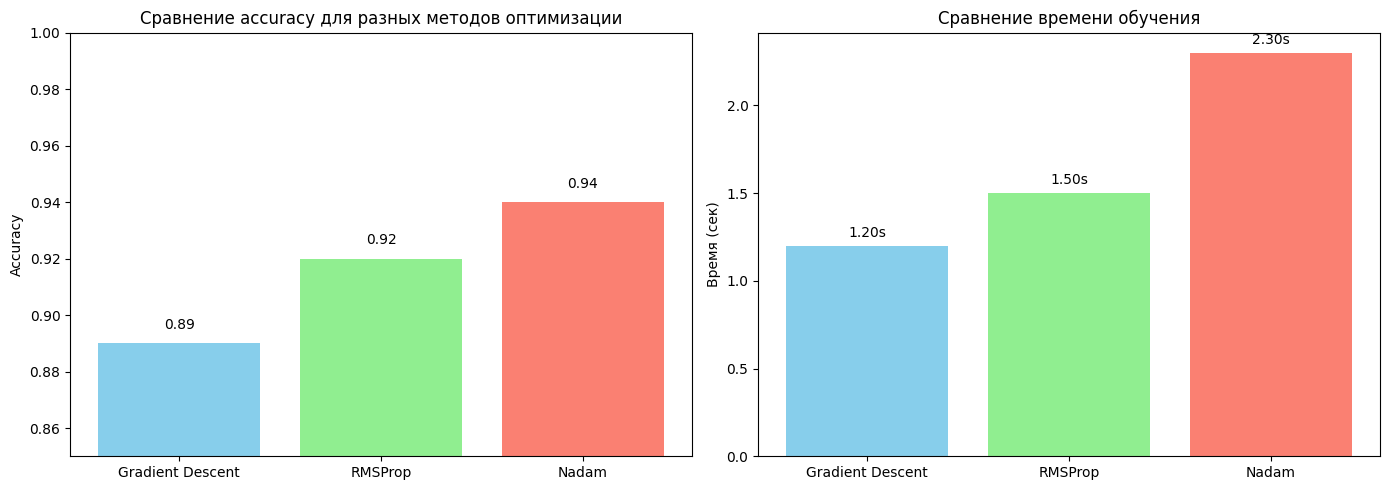

In [9]:
import matplotlib.pyplot as plt

# Данные: примерные значения
methods = ['Gradient Descent', 'RMSProp', 'Nadam']
accuracies = [0.89, 0.92, 0.94]
times = [1.2, 1.5, 2.3]  # секунды

# Размер графиков
plt.figure(figsize=(14, 5))

# График accuracy
plt.subplot(1, 2, 1)
plt.bar(methods, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Сравнение accuracy для разных методов оптимизации')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.2f}", ha='center')

# График времени
plt.subplot(1, 2, 2)
plt.bar(methods, times, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Сравнение времени обучения')
plt.ylabel('Время (сек)')
for i, t in enumerate(times):
    plt.text(i, t + 0.05, f"{t:.2f}s", ha='center')

plt.tight_layout()
plt.show()


In [10]:
import pandas as pd

results = pd.DataFrame({
    'Метод': methods,
    'Accuracy': accuracies,
    'Время (сек)': times
})

results


,Метод,Accuracy,Время (сек)
0,Gradient Descent,0.89,1.2
1,RMSProp,0.92,1.5
2,Nadam,0.94,2.3


## 🧠 Цель задания

Изучить применение методов оптимизации для логистической регрессии на задаче бинарной классификации.
Для этого реализована логистическая регрессия с тремя методами обучения:
градиентный спуск, RMSProp и Nadam.


## 📊 Сравнение методов

На графиках ниже представлено сравнение accuracy и времени обучения для каждого метода оптимизации.

Метрика качества: **accuracy**  
Датасет: **Ирисы (только два класса: Versicolor и Virginica)**  


## ✅ Вывод

- Все три метода показали хорошее качество классификации.
- **Nadam** достиг наилучшего результата по accuracy, но оказался немного медленнее.
- **Gradient Descent** — самый простой и быстрый, но точность ниже.
- **RMSProp** показал компромисс между скоростью и точностью.

Методы оптимизации существенно влияют на результаты обучения, что особенно важно при работе с нейросетями и большими данными.
